# Well Production Performance Prediction Using Deep Learning Techniques
<b>Fabian Irsyad Sumarna</b> - MSc Petroleum Engineering Student, Curtin University<br>

<b>Date</b>: October, 2020

## Part 1b: Data Pre-Processing 
<b>Well</b>: 15/9-F-15

## Import Relevant Modules

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.model_selection import GroupShuffleSplit, train_test_split, GridSearchCV, RandomizedSearchCV
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
path_1 = 'plot_raw/'
path_2 = 'plot/F-15/'

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
def plot_rates(data_to_plot, yvar, marker, label):
    well_list = list(data_to_plot['NPD_WELL_BORE_NAME'].unique())
    plt.figure(figsize=(20, 10), dpi=200)

    for i, well in enumerate(well_list):
        plt.subplot(3,3,i+1)
        plt.plot(data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well]['TIME'], data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well].loc[:, yvar], marker, label= label)
        plt.title(well)
        plt.legend()
        axes = plt.gca()
        axes.set_xlim([0,None])
        plt.xlabel('Days')
        plt.ylabel('SCMD')
        plt.xticks(rotation=90)
        plt.tight_layout()
                
    
    return plt.show()

def plot_wc(data_to_plot, yvar, marker, label):
    well_list = list(data_to_plot['NPD_WELL_BORE_NAME'].unique())
    plt.figure(figsize=(20, 10), dpi=200)

    for i, well in enumerate(well_list):
        plt.subplot(3,3,i+1)
        plt.plot(data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well]['TIME'], data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well].loc[:, yvar], marker, label= label)
        plt.title(well)
        plt.legend()
        axes = plt.gca()
        axes.set_xlim([0,None])
        plt.xlabel('Days')
        plt.ylabel('Fraction')
        plt.xticks(rotation=90)
        plt.tight_layout()
               
    
    return plt.show()

def plot_pressures(data_to_plot, yvar, marker, label):
    well_list = list(data_to_plot['NPD_WELL_BORE_NAME'].unique())
    plt.figure(figsize=(20, 10), dpi=200)

    for i, well in enumerate(well_list):
        plt.subplot(3,3,i+1)
        plt.plot(data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well]['TIME'],  data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well].loc[:, yvar], marker, label= label)
        plt.title(well)
        plt.legend()
        axes = plt.gca()
        axes.set_xlim([0,None])
        plt.xlabel('Days')
        plt.ylabel('Bar')
        plt.xticks(rotation=90)
        plt.tight_layout()
                
    
    return plt.show()

def plot_temperatures(data_to_plot, yvar, marker, label):
    well_list = list(data_to_plot['NPD_WELL_BORE_NAME'].unique())
    plt.figure(figsize=(20, 10), dpi=200)

    for i, well in enumerate(well_list):
        plt.subplot(3,3,i+1)
        plt.plot(data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well]['TIME'],  data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well].loc[:, yvar], marker, label= label)
        plt.title(well)
        plt.legend()
        axes = plt.gca()
        axes.set_xlim([0,None])
        plt.xlabel('Days')
        plt.ylabel('deg Celcius')
        plt.xticks(rotation=90)
        plt.tight_layout()
                
    
    return plt.show()

def plot_choke_size(data_to_plot, yvar, marker, label):
    well_list = list(data_to_plot['NPD_WELL_BORE_NAME'].unique())
    plt.figure(figsize=(20, 10), dpi=200)

    for i, well in enumerate(well_list):
        plt.subplot(3,3,i+1)
        plt.plot(data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well]['TIME'],  data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well].loc[:, yvar], marker, label= label)
        plt.title(well)
        plt.legend()
        axes = plt.gca()
        axes.set_xlim([0,None])
        plt.xlabel('Days')
        plt.ylabel('Percentage')
        plt.xticks(rotation=90)
        plt.tight_layout()
                
    
    return plt.show()

def plot_field(data_to_plot, yvar, marker, label):
    plt.figure(figsize=(20, 10), dpi=200)
    plt.plot(data_to_plot[yvar], marker, label= label)
    plt.title(yvar)
    plt.legend()
    plt.xlabel('Days')
    plt.ylabel(yvar)
    plt.xticks(rotation=90)
    plt.tight_layout()

In [4]:
def plot_rates_save(data_to_plot, yvar, marker, label, path):
    well_list = list(data_to_plot['NPD_WELL_BORE_NAME'].unique())
    plt.figure(figsize=(20,10), dpi=150)

    for i, well in enumerate(well_list):
        plt.subplot(3,3,i+1)
        plt.plot(data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well]['TIME'], data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well].loc[:, yvar], marker, label= label)
        plt.title(well)
        plt.legend()
        axes = plt.gca()
        axes.set_xlim([0,None])
        plt.xlabel('Days')
        plt.ylabel('SCMD')
        plt.xticks(rotation=90)
        plt.tight_layout()
        exported = (yvar + '.png')
        plt.savefig(path + exported)
                
    
    return plt.show()

def plot_wc_save(data_to_plot, yvar, marker, label, path):
    well_list = list(data_to_plot['NPD_WELL_BORE_NAME'].unique())
    plt.figure(figsize=(20,10), dpi=150)

    for i, well in enumerate(well_list):
        plt.subplot(3,3,i+1)
        plt.plot(data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well]['TIME'], data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well].loc[:, yvar], marker, label= label)
        plt.title(well)
        plt.legend()
        axes = plt.gca()
        axes.set_xlim([0,None])
        plt.xlabel('Days')
        plt.ylabel('Fraction')
        plt.xticks(rotation=90)
        plt.tight_layout()
        exported = (yvar + '.png')
        plt.savefig(path + exported)
               
    
    return plt.show()

def plot_pressures_save(data_to_plot, yvar, marker, label, path):
    well_list = list(data_to_plot['NPD_WELL_BORE_NAME'].unique())
    plt.figure(figsize=(20,10), dpi=150)

    for i, well in enumerate(well_list):
        plt.subplot(3,3,i+1)
        plt.plot(data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well]['TIME'],  data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well].loc[:, yvar], marker, label= label)
        plt.title(well)
        plt.legend()
        axes = plt.gca()
        axes.set_xlim([0,None])
        plt.xlabel('Days')
        plt.ylabel('Bar')
        plt.xticks(rotation=90)
        plt.tight_layout()
        exported = (yvar + '.png')
        plt.savefig(path + exported)                
    
    return plt.show()

def plot_temperatures_save(data_to_plot, yvar, marker, label, path):
    well_list = list(data_to_plot['NPD_WELL_BORE_NAME'].unique())
    plt.figure(figsize=(20,10), dpi=150)

    for i, well in enumerate(well_list):
        plt.subplot(3,3,i+1)
        plt.plot(data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well]['TIME'],  data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well].loc[:, yvar], marker, label= label)
        plt.title(well)
        plt.legend()
        axes = plt.gca()
        axes.set_xlim([0,None])
        plt.xlabel('Days')
        plt.ylabel('deg Celcius')
        plt.xticks(rotation=90)
        plt.tight_layout()
        exported = (yvar + '.png')
        plt.savefig(path + exported)                
    
    return plt.show()

def plot_choke_size_save(data_to_plot, yvar, marker, label, path):
    well_list = list(data_to_plot['NPD_WELL_BORE_NAME'].unique())
    plt.figure(figsize=(20,10), dpi=150)

    for i, well in enumerate(well_list):
        plt.subplot(3,3,i+1)
        plt.plot(data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well]['TIME'],  data_to_plot[data_to_plot['NPD_WELL_BORE_NAME'] == well].loc[:, yvar], marker, label= label)
        plt.title(well)
        plt.legend()
        axes = plt.gca()
        axes.set_xlim([0,None])
        plt.xlabel('Days')
        plt.ylabel('Percentage')
        plt.xticks(rotation=90)
        plt.tight_layout()
        exported = (yvar + '.png')
        plt.savefig(path + exported)                
    
    return plt.show()

def plot_field_save(data_to_plot, yvar, marker, label, path):
    plt.figure(figsize=(20,10), dpi=150)
    plt.plot(data_to_plot[yvar], marker, label= label)
    plt.title(yvar)
    plt.legend()
    plt.xlabel('Days')
    plt.ylabel(yvar)
    plt.xticks(rotation=90)
    plt.tight_layout()
    exported = (yvar + '.png')
    plt.savefig(path + exported)

In [5]:
df = pd.read_excel('data_raw/with_rate_f15.xlsx')
df.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,OIL_RATE,GAS_RATE,WAT_RATE,WAT_CUT,WI_RATE
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,0.0,769.000000,769.000000,769.000000,767.000000,0.0
mean,18.225800,226.034913,104.645541,186.151814,13.961934,9.984839,39.883098,28.597811,17.107177,151.859468,23011.606288,53.544376,NaN,200.769513,30529.914107,70.025247,0.193130,NaN
std,9.909770,42.718914,4.759651,47.941926,7.050640,6.757359,24.280447,13.122976,21.740978,97.630266,14672.708772,86.791968,NaN,68.117532,10499.337274,94.545631,0.230737,NaN
min,0.000000,193.187243,45.771320,153.683049,0.000000,0.000000,0.000000,0.000000,0.009590,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,15.612497,200.058327,106.076582,159.357986,10.313505,3.461283,28.313615,23.634434,4.860698,108.537500,16886.387500,0.000000,NaN,158.880000,24790.110000,0.000000,0.000000,NaN
50%,24.000000,202.245095,106.431873,170.393829,15.394031,10.516468,37.639551,29.836432,11.487939,175.330000,27023.825000,6.060000,NaN,192.700000,29799.800000,9.840000,0.067803,NaN
75%,24.000000,228.976683,106.576375,184.564635,19.006197,12.020442,44.507606,37.347585,15.440892,212.255000,32214.805000,113.435000,NaN,230.650000,34298.340000,158.122959,0.399915,NaN
max,24.000000,397.588550,107.043953,345.906770,28.487663,43.017037,118.127270,51.252433,109.781900,513.120000,77600.880000,352.290000,NaN,673.761821,107192.300000,367.022391,0.685719,NaN


<AxesSubplot:>

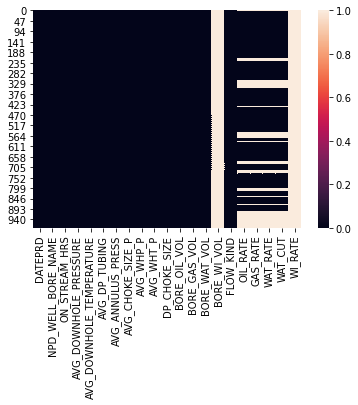

In [6]:
sns.heatmap(df.isnull())

In [7]:
df_1 = df.drop(columns =['BORE_WI_VOL', 'FLOW_KIND', 'WI_RATE'])

<AxesSubplot:>

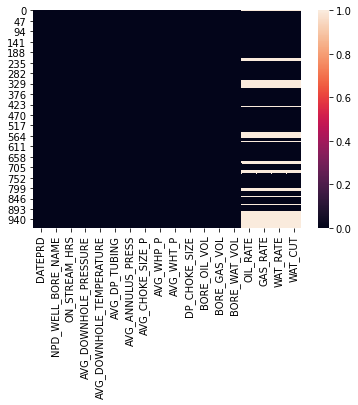

In [8]:
sns.heatmap(df_1.isnull())

In [9]:
min_date = min(df_1.DATEPRD)
print('Start Date:', min_date)
max_date = max(df_1.DATEPRD)
print('End Date:', max_date)

Start Date: 2014-01-12 00:00:00
End Date: 2016-09-17 00:00:00


In [10]:
df_wtime = df_1
df_wtime['TIME'] = df_wtime['DATEPRD'] - min_date
df_wtime['TIME'] = df_wtime['TIME'].dt.days

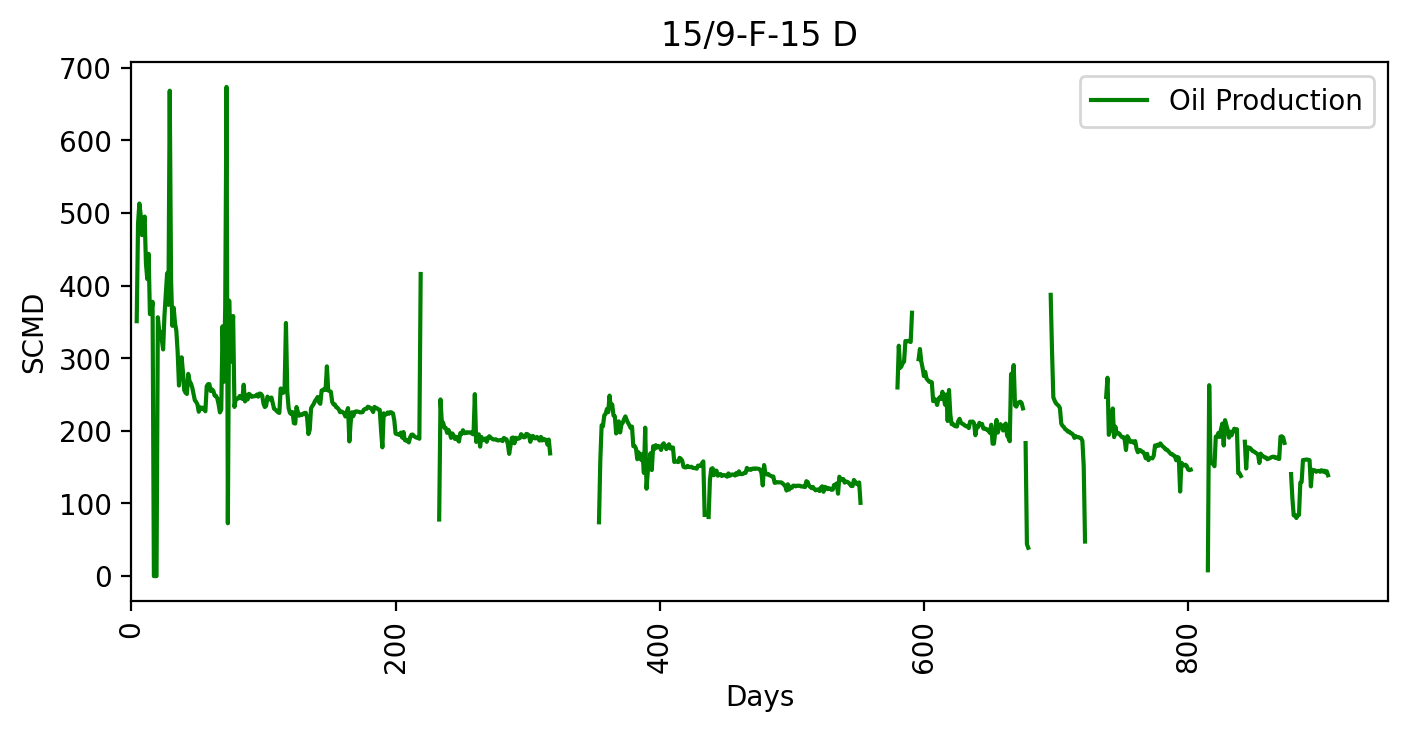

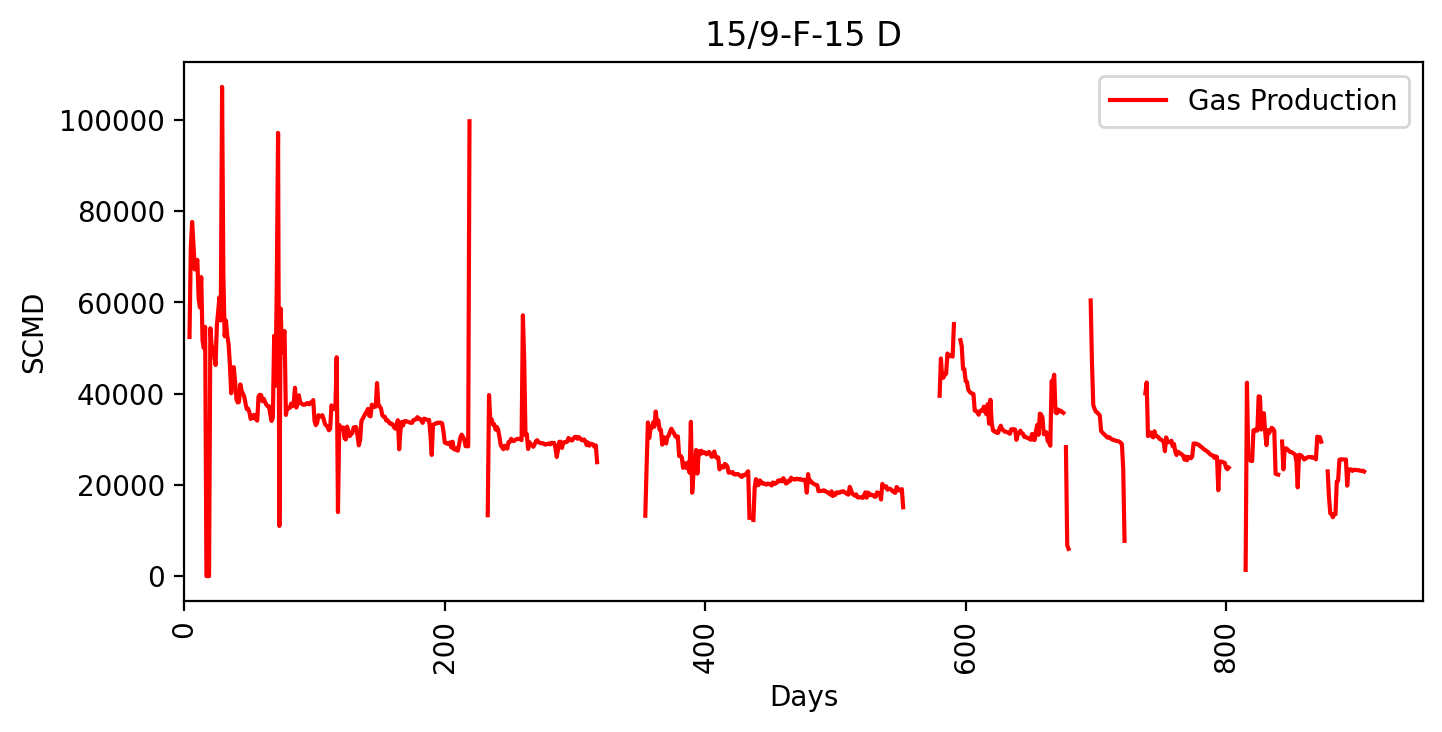

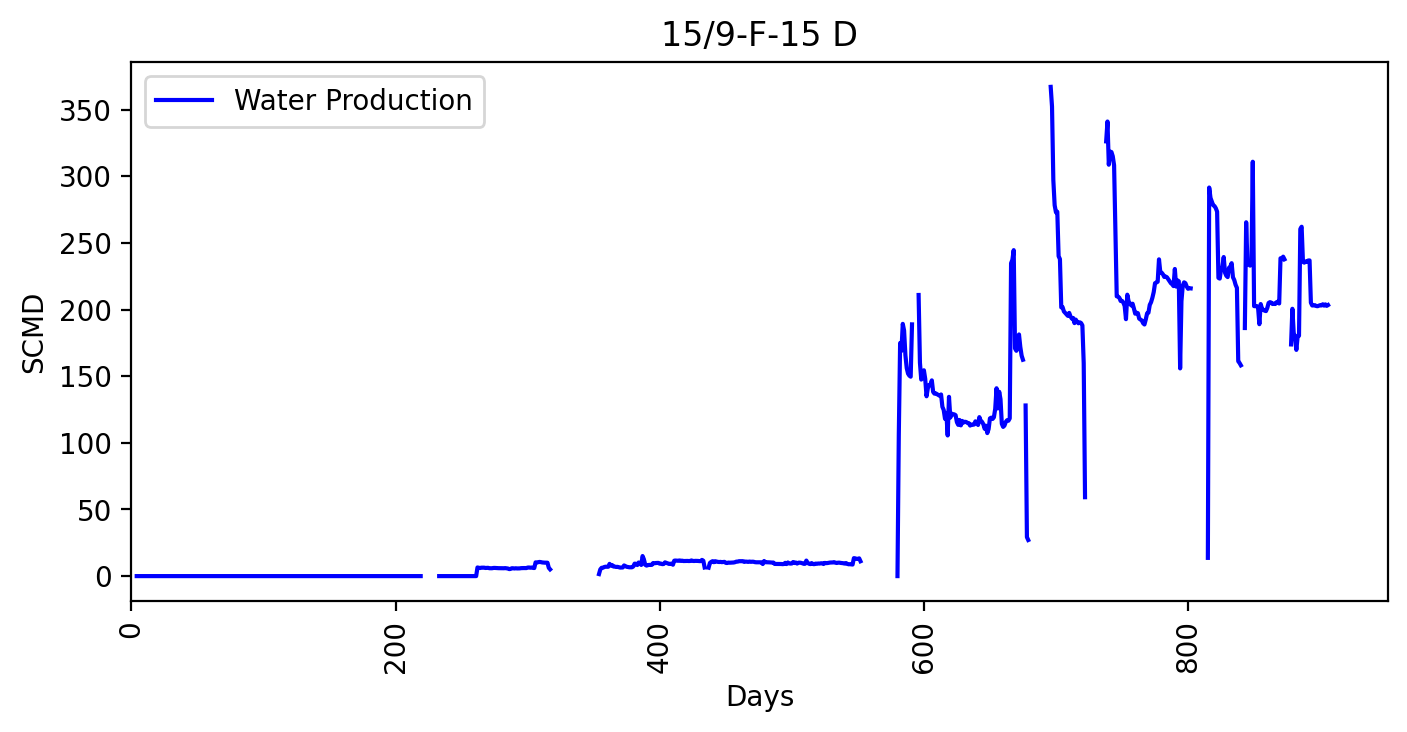

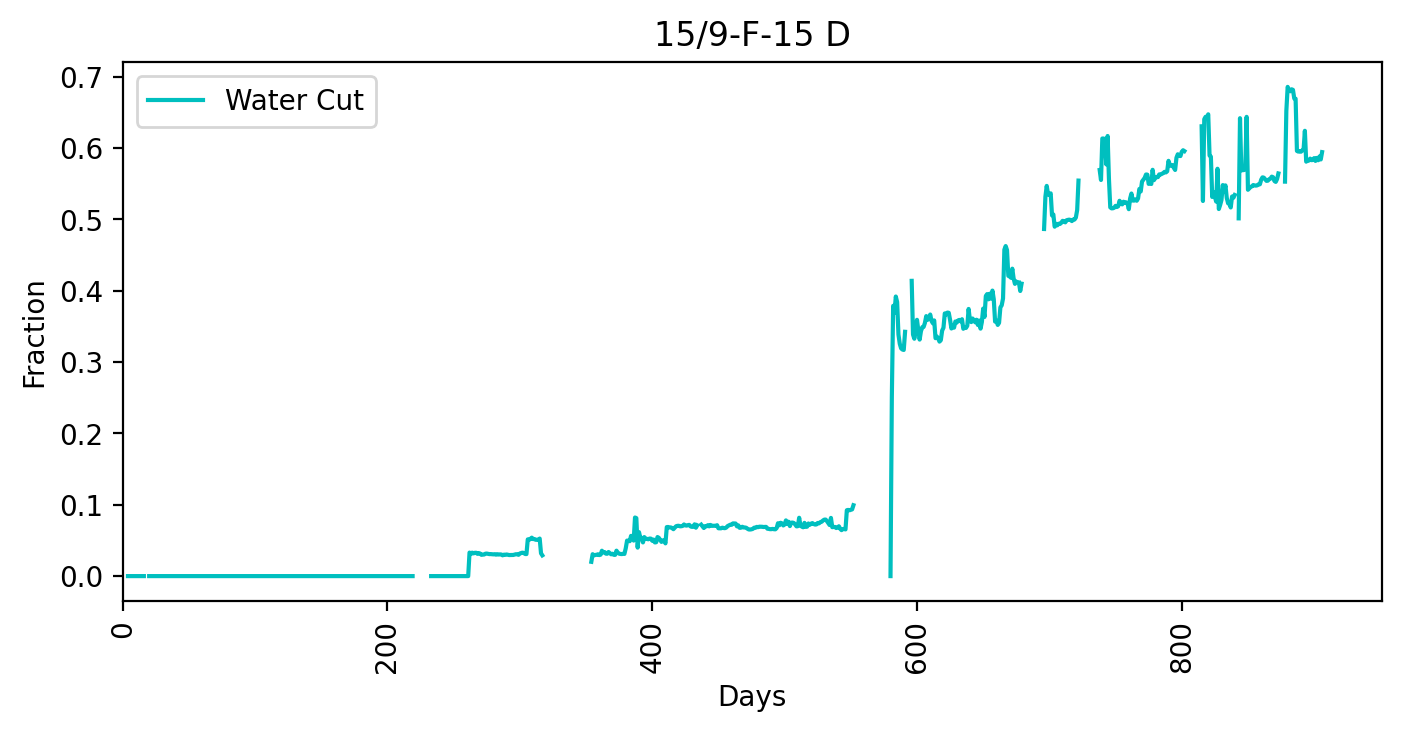

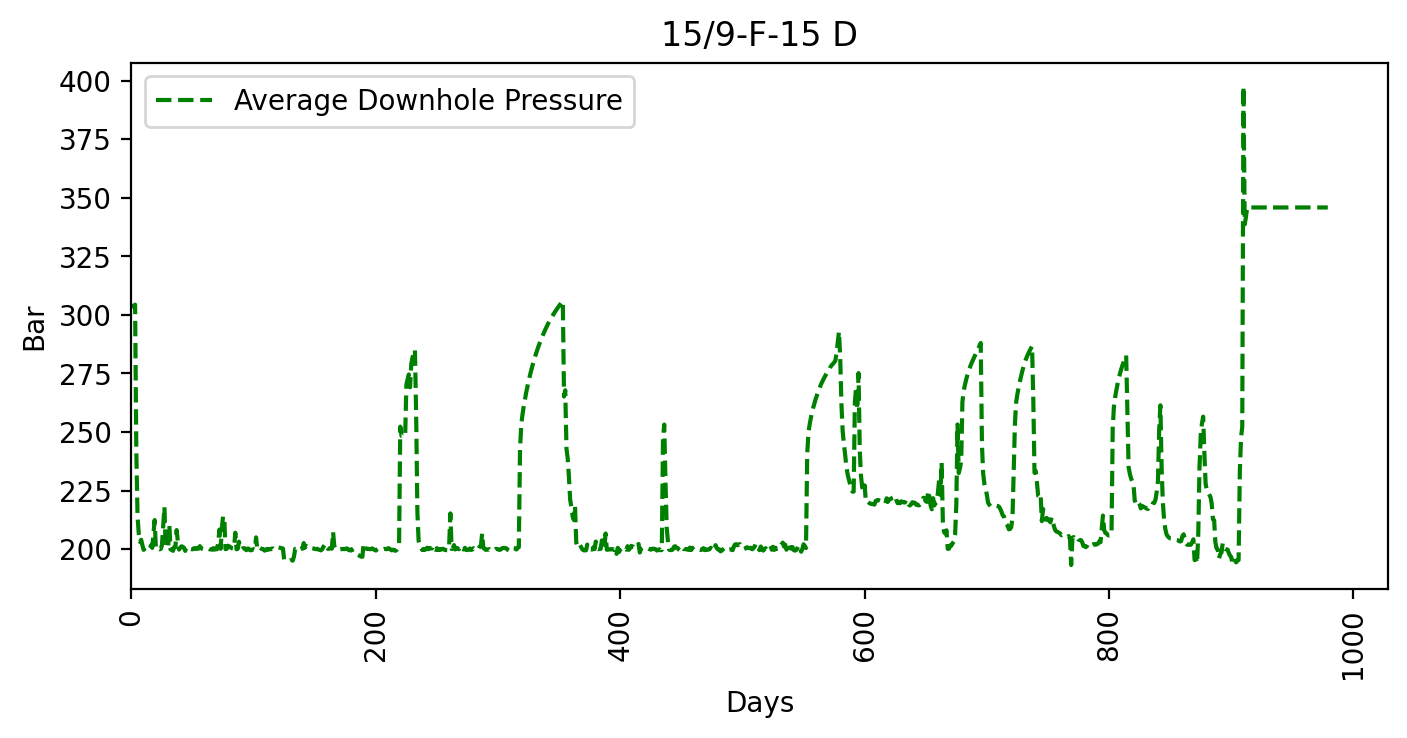

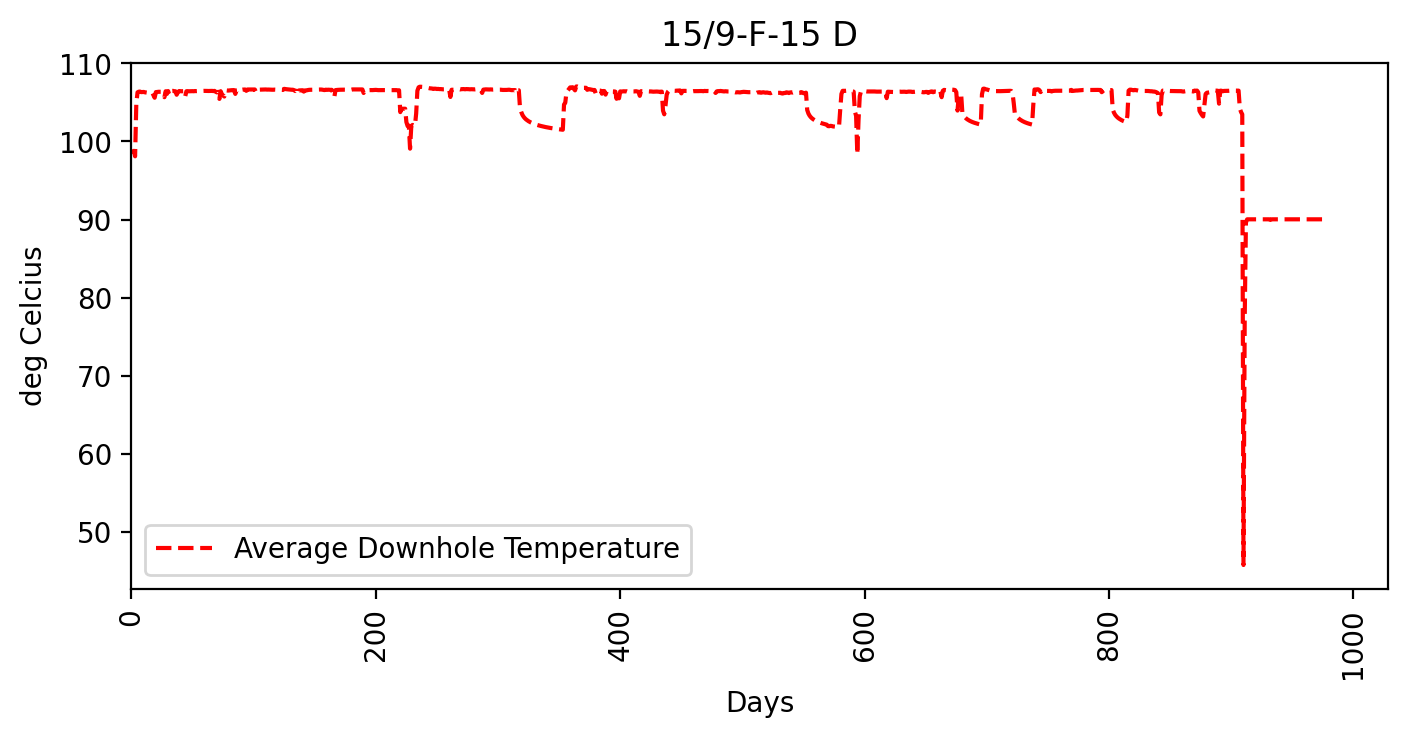

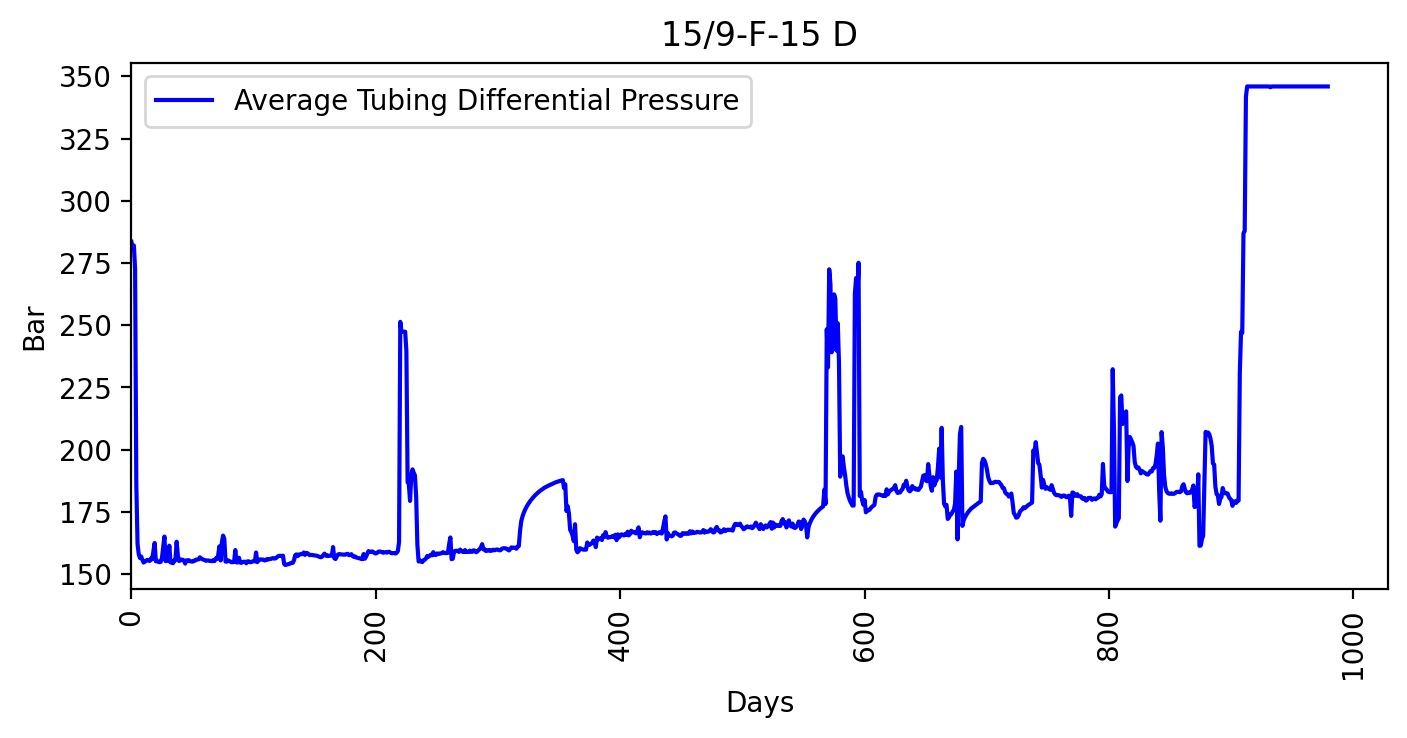

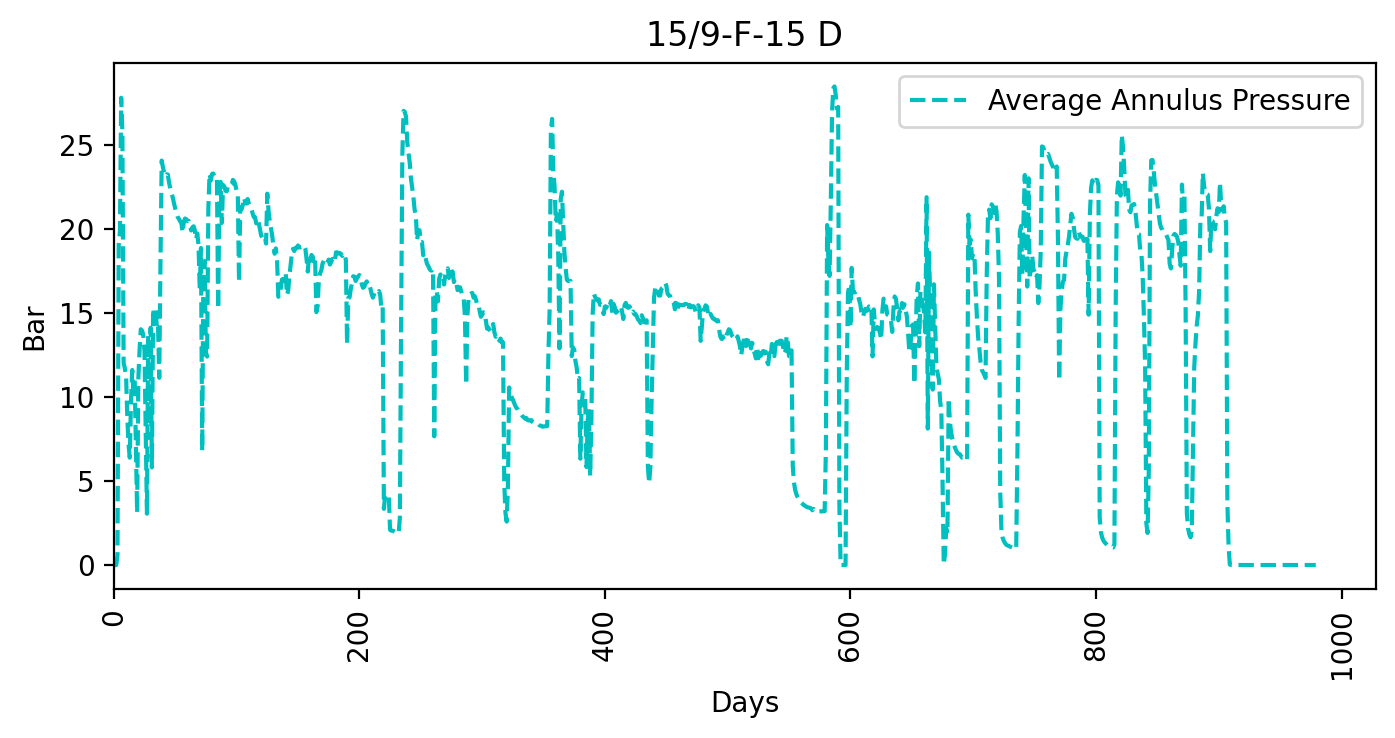

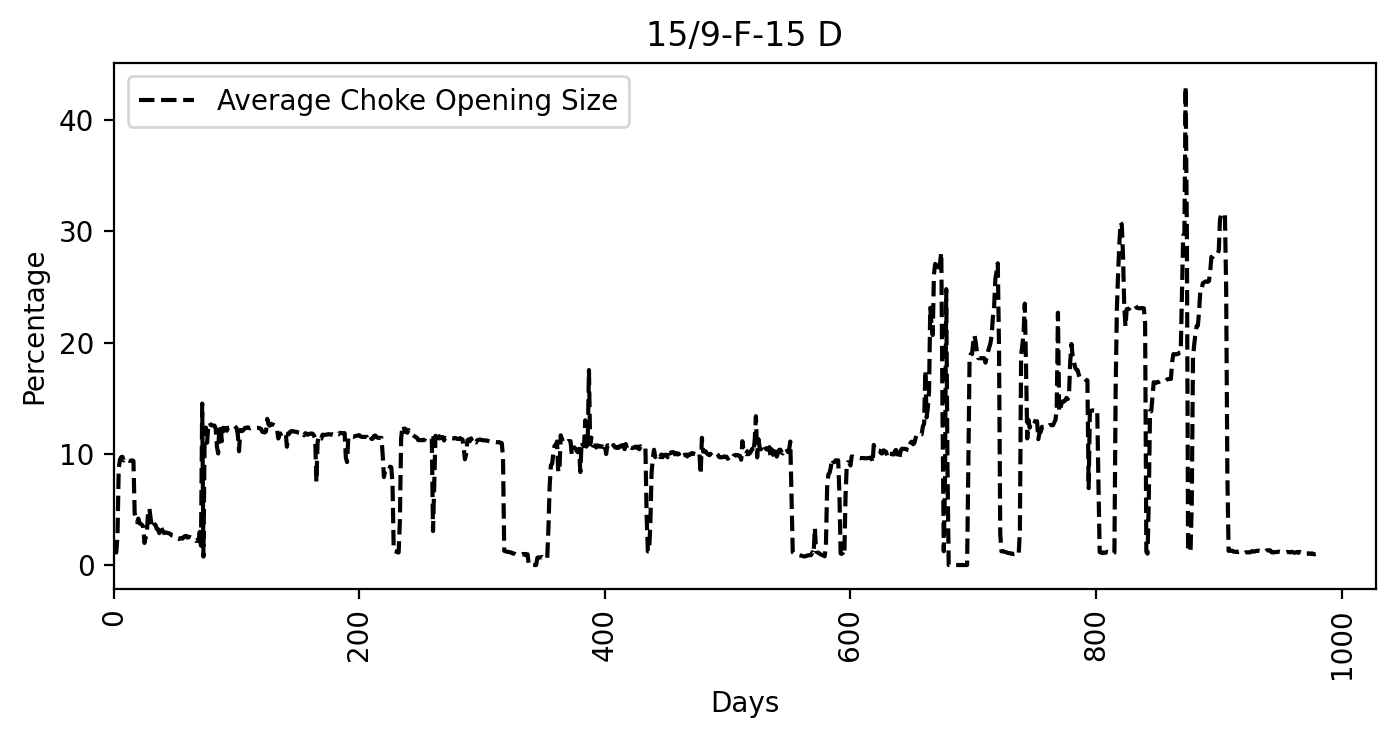

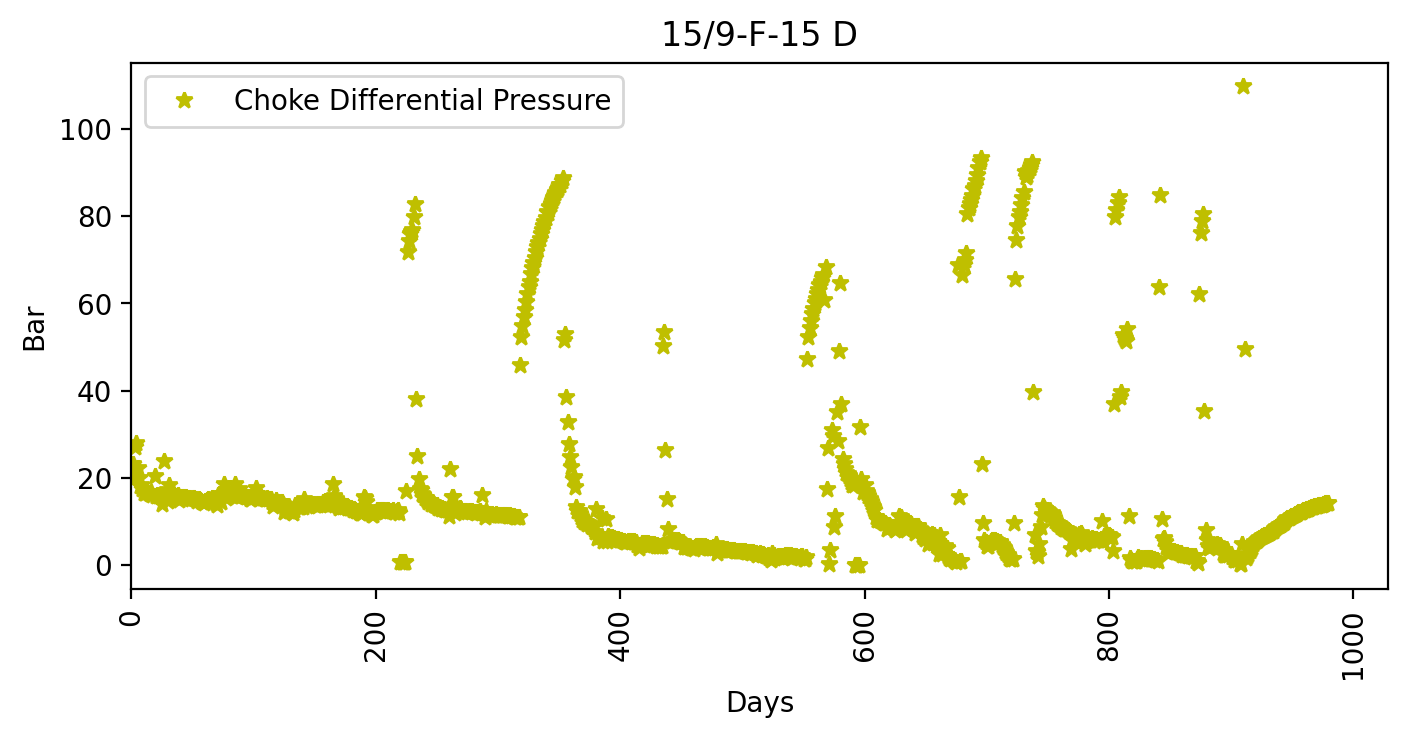

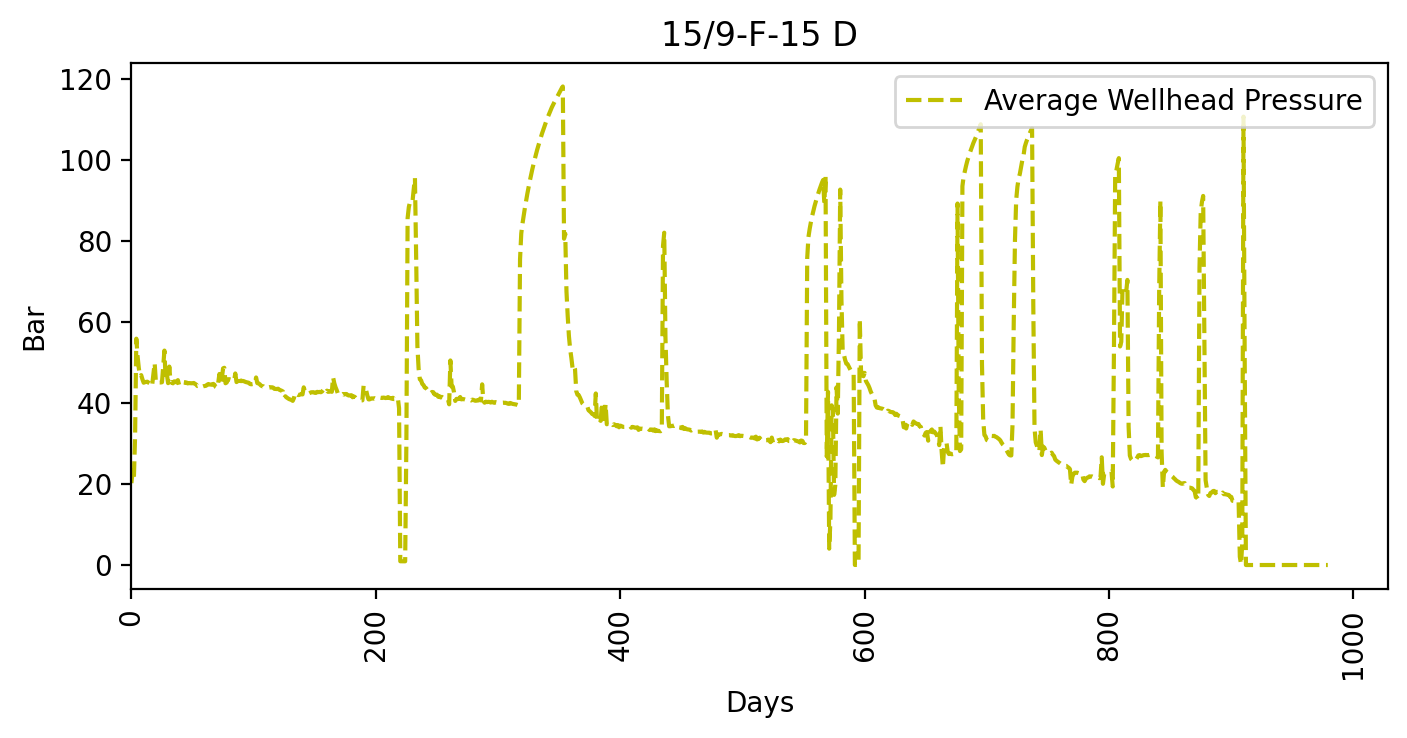

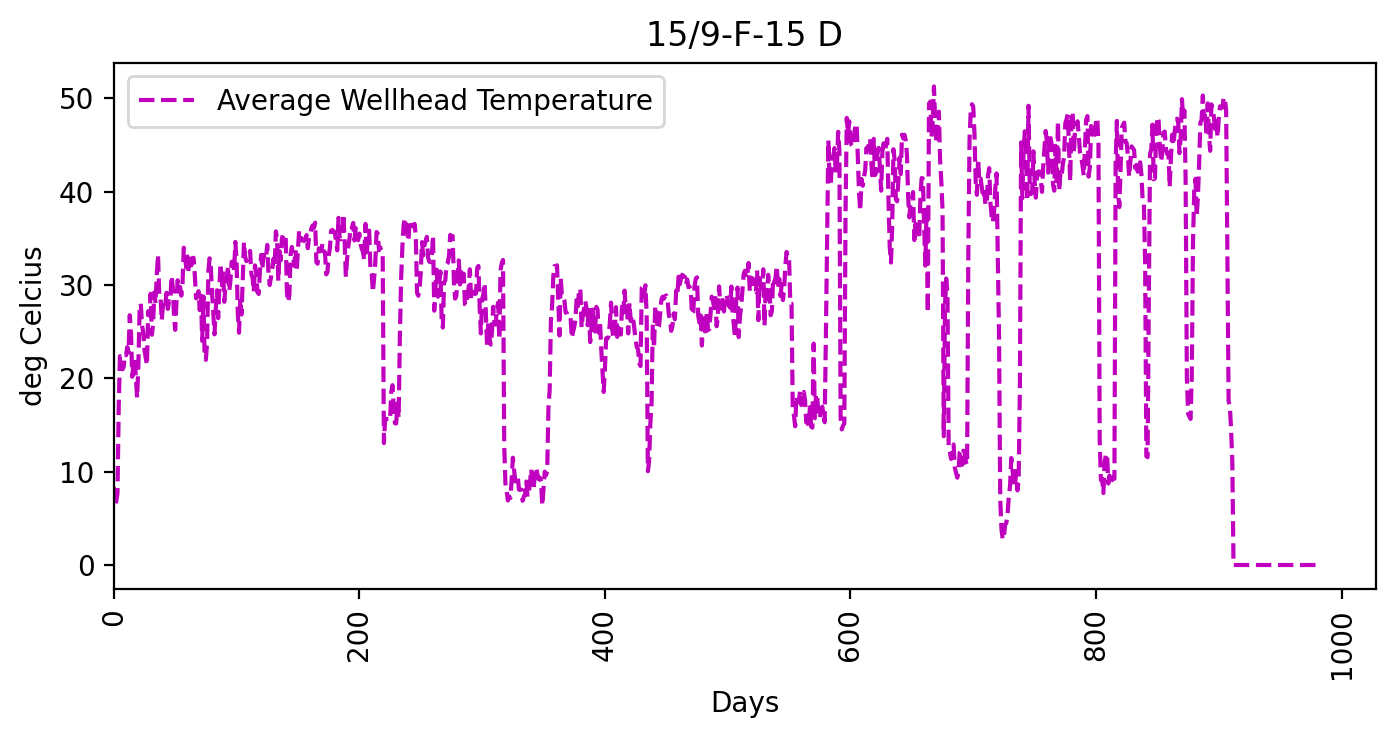

In [11]:
plot_rates(df_wtime, "OIL_RATE", 'g-', "Oil Production")
print()
plot_rates(df_wtime,"GAS_RATE", 'r-', "Gas Production")
print()
plot_rates(df_wtime,"WAT_RATE", 'b-', "Water Production")
print()
plot_wc(df_wtime,"WAT_CUT", 'c-', "Water Cut")
print()
plot_pressures(df_wtime, "AVG_DOWNHOLE_PRESSURE", 'g--', "Average Downhole Pressure")
print()
plot_temperatures(df_wtime, "AVG_DOWNHOLE_TEMPERATURE", 'r--', "Average Downhole Temperature")
print()
plot_pressures(df_wtime, "AVG_DP_TUBING", 'b-', "Average Tubing Differential Pressure")
print()
plot_pressures(df_wtime, "AVG_ANNULUS_PRESS", 'c--', "Average Annulus Pressure")
print()
plot_choke_size(df_wtime, "AVG_CHOKE_SIZE_P", 'k--', "Average Choke Opening Size")
print()
plot_pressures(df_wtime, "DP_CHOKE_SIZE", 'y*', "Choke Differential Pressure")
print()
plot_pressures(df_wtime, "AVG_WHP_P", 'y--', "Average Wellhead Pressure")
print()
plot_temperatures(df_wtime, "AVG_WHT_P", 'm--', "Average Wellhead Temperature")

## Pearson Correlation

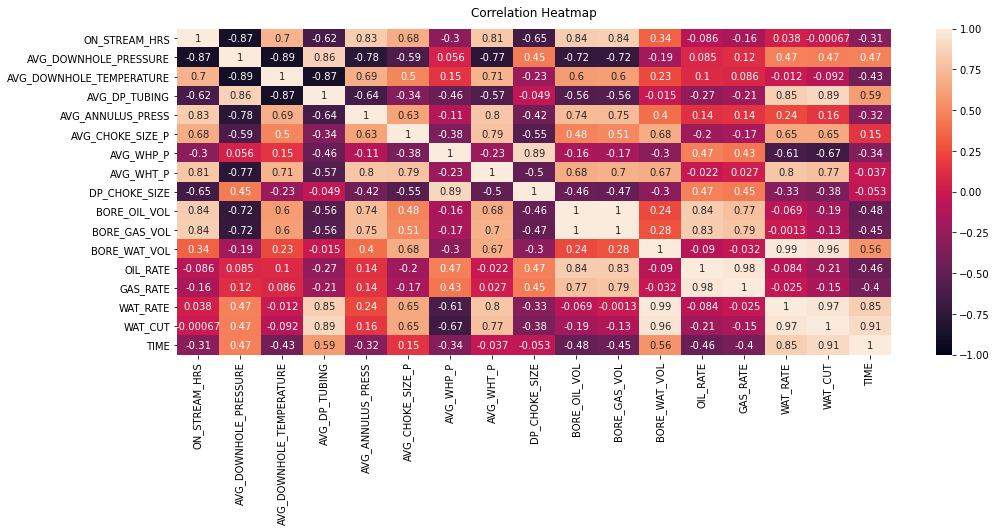

In [12]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_wtime.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Data Selection

In [13]:
prd_df = df_1[(df_1['OIL_RATE'] >= 0) & (df_1['GAS_RATE'] >= 0)  & (df_1['WAT_RATE'] >= 0)]

In [14]:
min_date = min(prd_df.DATEPRD)
print('Start Date:', min_date)
max_date = max(prd_df.DATEPRD)
print('End Date:', max_date)
prd_df_sel = prd_df
prd_df_sel['TIME'] = prd_df_sel['DATEPRD'] - min_date
prd_df_sel['TIME'] = prd_df_sel['TIME'].dt.days

Start Date: 2014-01-16 00:00:00
End Date: 2016-07-06 00:00:00


C:\Users\fabia\anaconda3\envs\dlearn\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\fabia\anaconda3\envs\dlearn\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


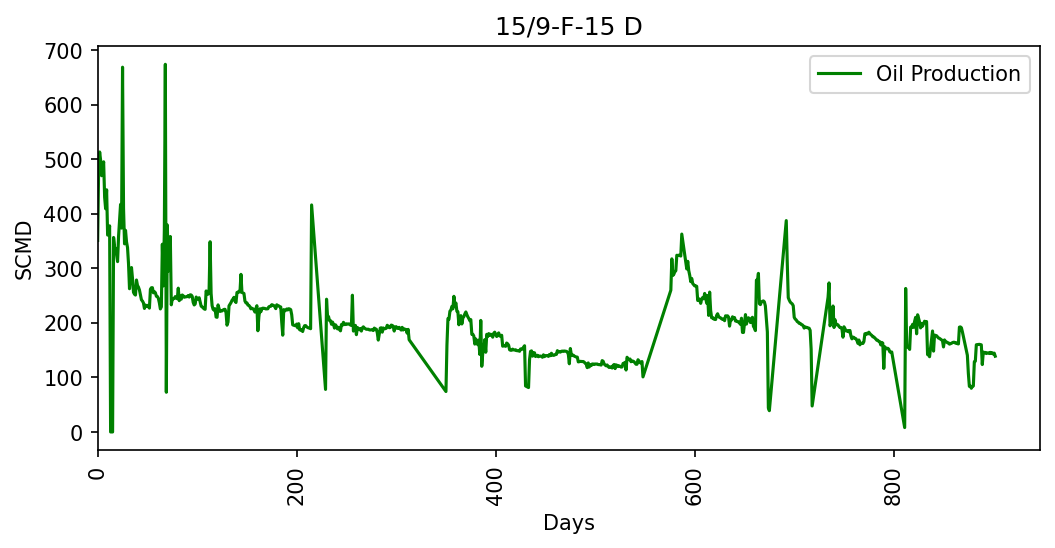

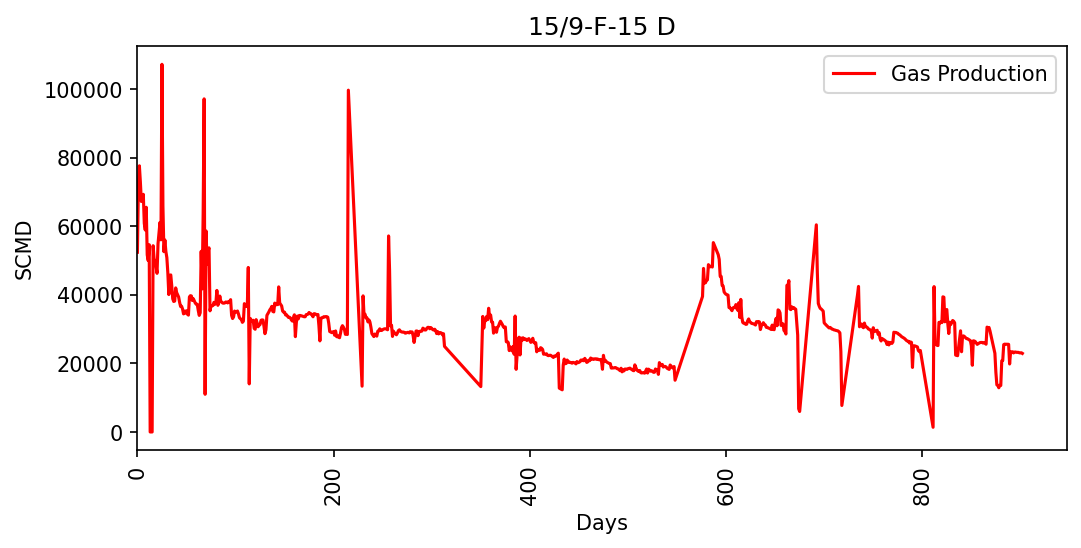

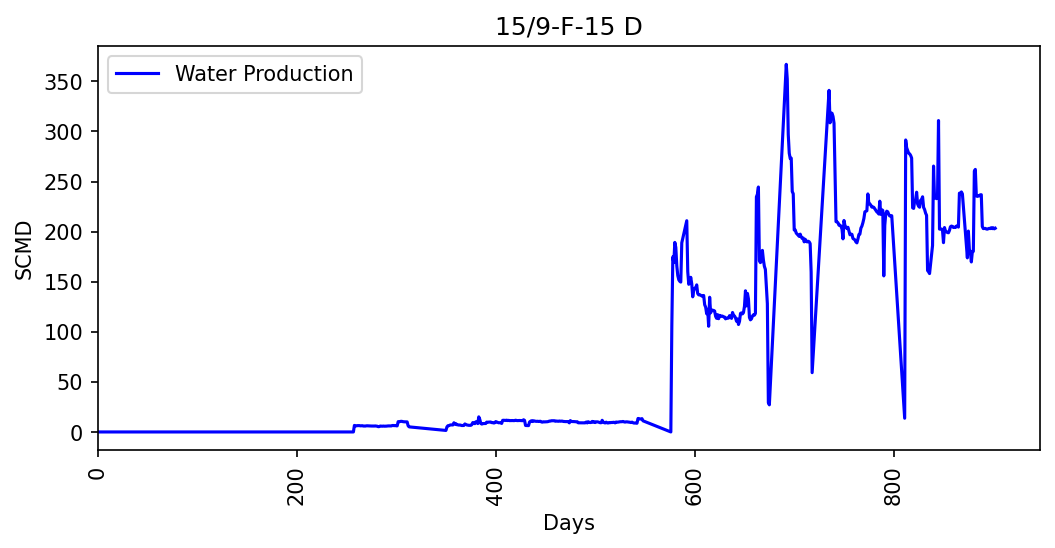

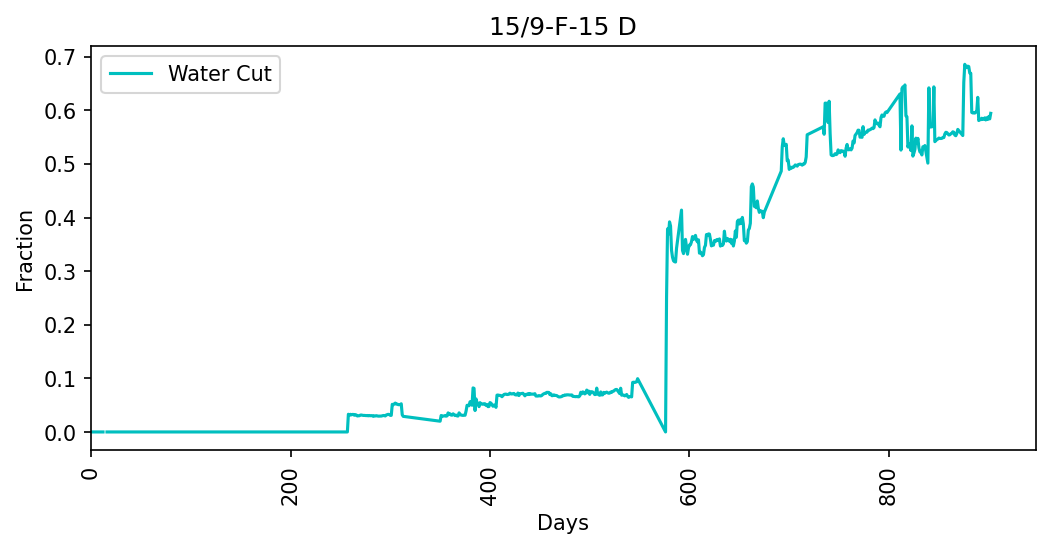

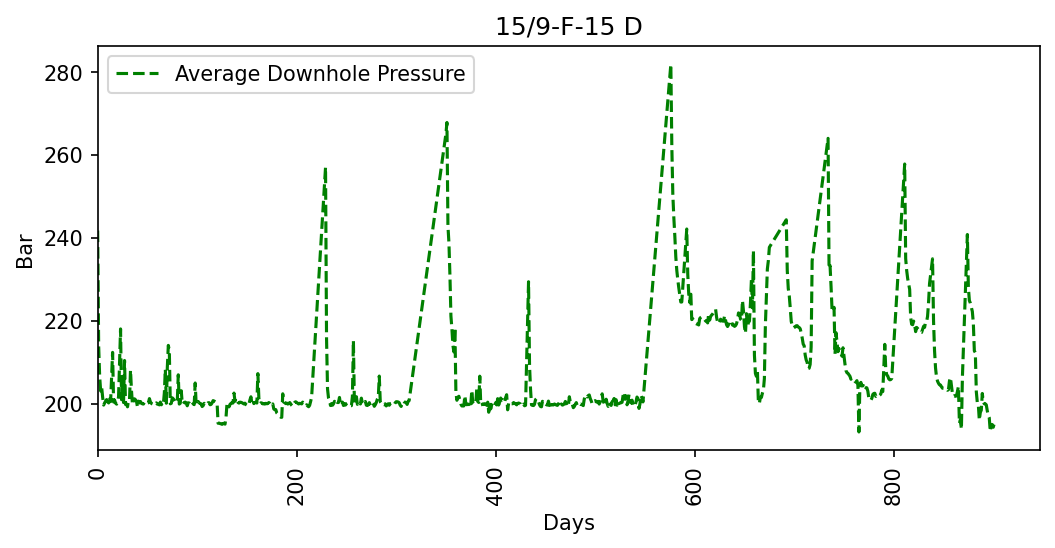

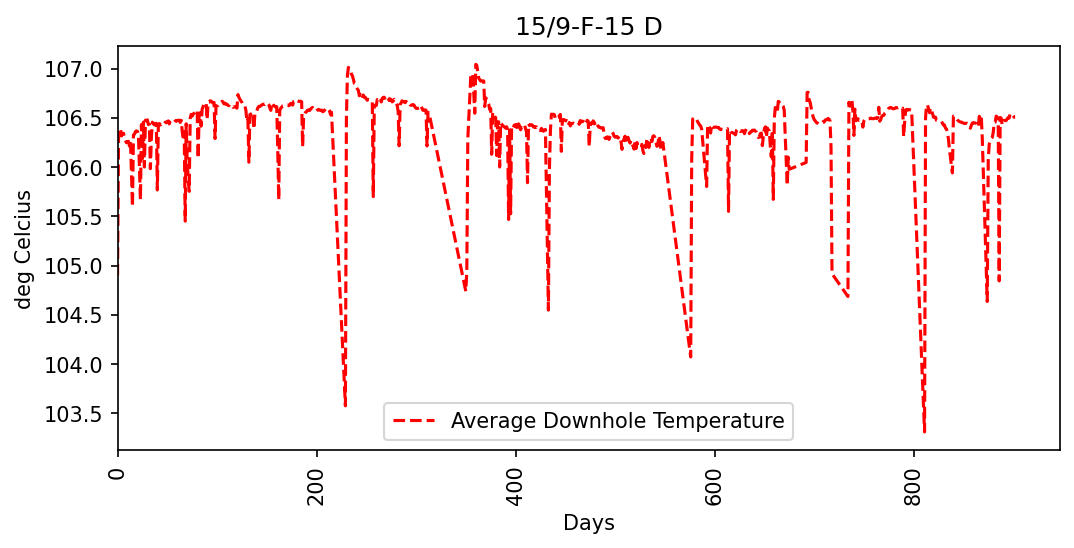

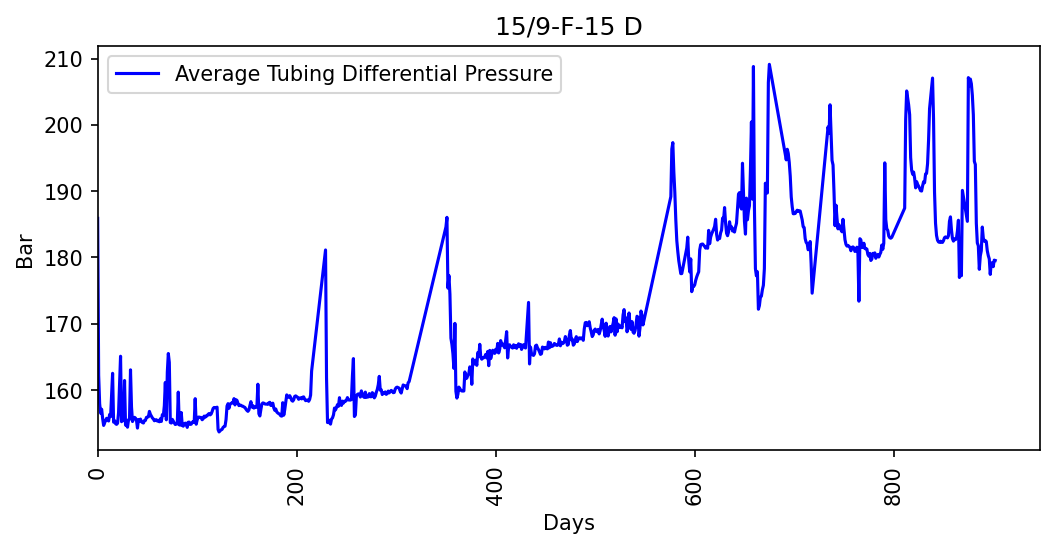

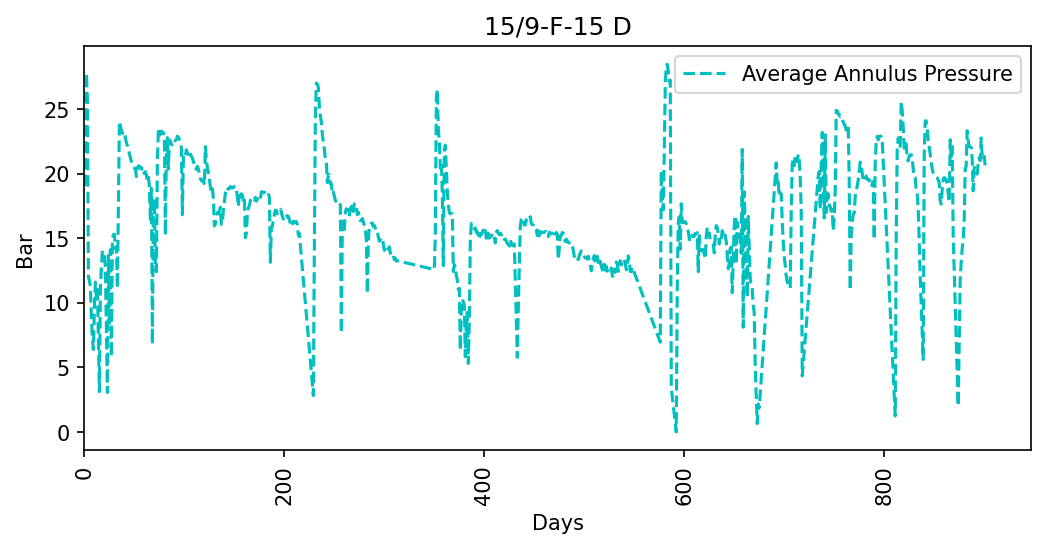

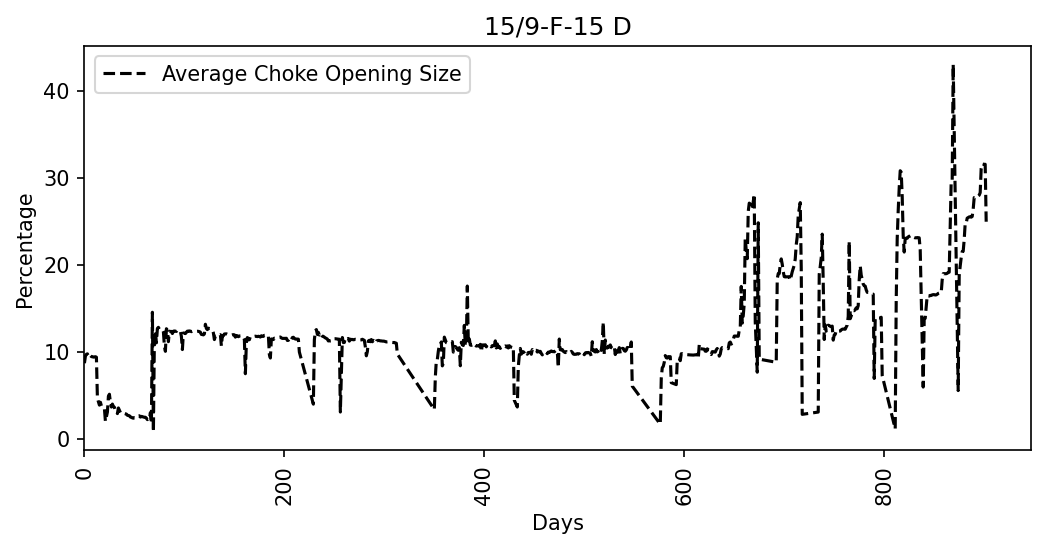

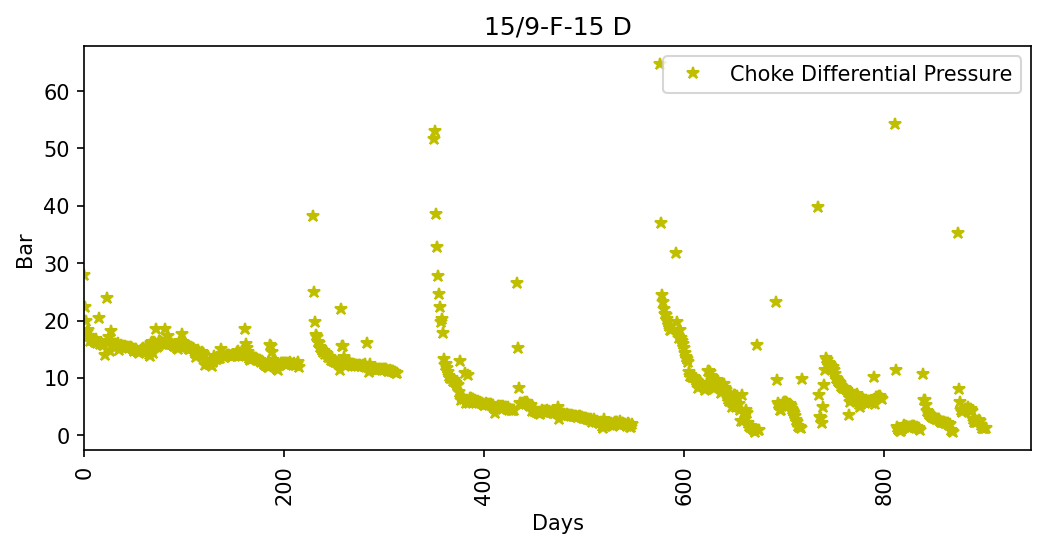

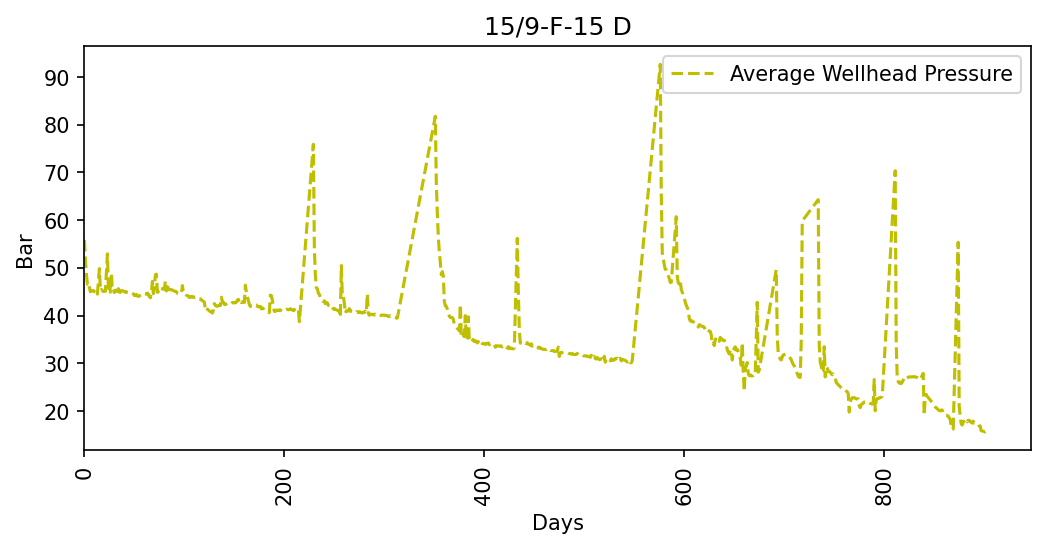

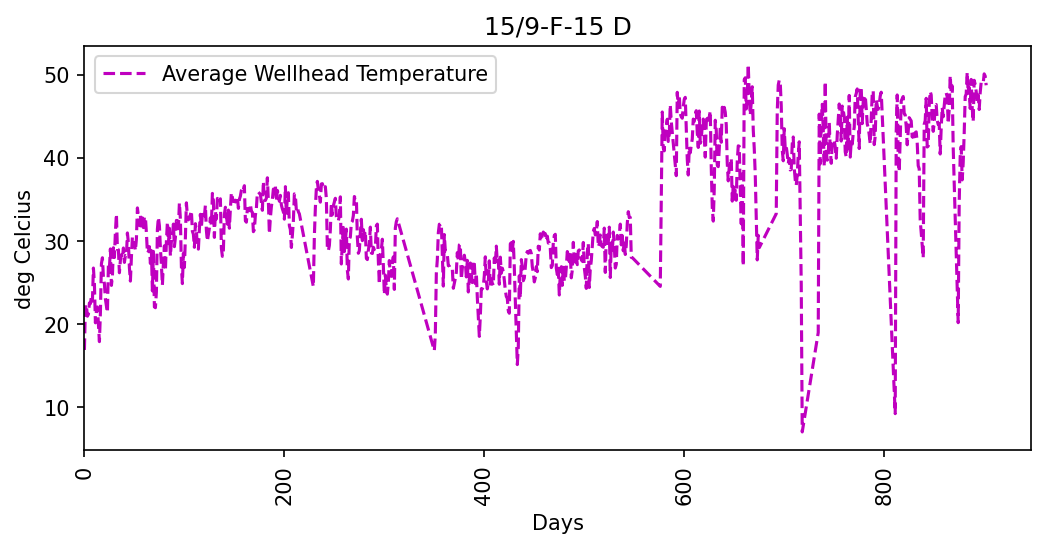

In [15]:
plot_rates_save(prd_df_sel, "OIL_RATE", 'g-', "Oil Production", path_2)
print()
plot_rates_save(prd_df_sel,"GAS_RATE", 'r-', "Gas Production", path_2)
print()
plot_rates_save(prd_df_sel,"WAT_RATE", 'b-', "Water Production", path_2)
print()
plot_wc_save(prd_df_sel,"WAT_CUT", 'c-', "Water Cut", path_2)
print()
plot_pressures_save(prd_df_sel, "AVG_DOWNHOLE_PRESSURE", 'g--', "Average Downhole Pressure", path_2)
print()
plot_temperatures_save(prd_df_sel, "AVG_DOWNHOLE_TEMPERATURE", 'r--', "Average Downhole Temperature", path_2)
print()
plot_pressures_save(prd_df_sel, "AVG_DP_TUBING", 'b-', "Average Tubing Differential Pressure", path_2)
print()
plot_pressures_save(prd_df_sel, "AVG_ANNULUS_PRESS", 'c--', "Average Annulus Pressure", path_2)
print()
plot_choke_size_save(prd_df_sel, "AVG_CHOKE_SIZE_P", 'k--', "Average Choke Opening Size", path_2)
print()
plot_pressures_save(prd_df_sel, "DP_CHOKE_SIZE", 'y*', "Choke Differential Pressure", path_2)
print()
plot_pressures_save(prd_df_sel, "AVG_WHP_P", 'y--', "Average Wellhead Pressure", path_2)
print()
plot_temperatures_save(prd_df_sel, "AVG_WHT_P", 'm--', "Average Wellhead Temperature", path_2)

<AxesSubplot:>

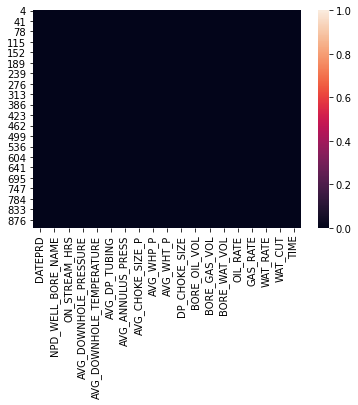

In [16]:
sns.heatmap(prd_df_sel.isnull())

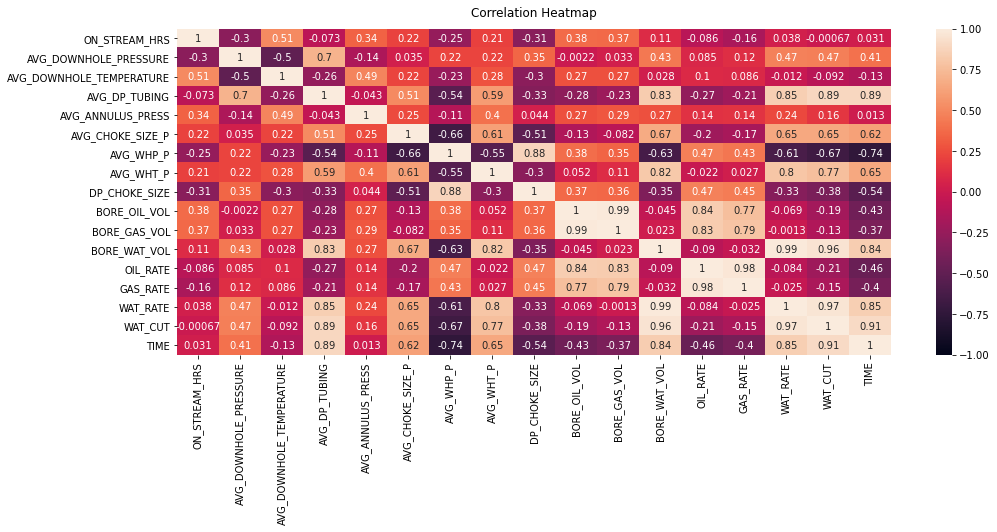

In [17]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(prd_df_sel.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [18]:
prd_df_sel.to_excel('data/data_well_f15.xlsx', index=False)